<a href="https://colab.research.google.com/github/dagim19/MicroGrad-Exercise/blob/main/Copy_of_micrograd_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# micrograd exercises

1. watch the [micrograd video](https://www.youtube.com/watch?v=VMj-3S1tku0) on YouTube
2. come back and complete these exercises to level up :)

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## section 1: derivatives

In [ ]:
# here is a mathematical expression that takes 3 inputs and produces one output
from math import sin, cos, sqrt

def f(a, b, c):
  return -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5

print(f(2, 3, 4))

6.336362190988558


In [ ]:
# write the function df that returns the analytical gradient of f
# i.e. use your skills from calculus to take the derivative, then implement the formula
# if you do not calculus then feel free to ask wolframalpha, e.g.:
# https://www.wolframalpha.com/input?i=d%2Fda%28sin%283*a%29%29%29

def gradf(a, b, c):
  dfda = -3*a**2 - 1/(2*sqrt(a))
  dfdb = 3*cos(3*b) + 2.5*b**1.5
  dfdc = c**-2
  return [dfda, dfdb, dfdc] # todo, return [df/da, df/db, df/dc]

# expected answer is the list of 
ans = [-12.353553390593273, 10.25699027111255, 0.0625]
yours = gradf(2, 3, 4)
print(yours)
for dim in range(3):
  ok = 'OK' if abs(yours[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {yours[dim]}")


[-12.353553390593273, 10.25699027111255, 0.0625]
OK for dim 0: expected -12.353553390593273, yours returns -12.353553390593273
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027111255
OK for dim 2: expected 0.0625, yours returns 0.0625


In [ ]:
# now estimate the gradient numerically without any calculus, using
# the approximation we used in the video.
# you should not call the function df from the last cell

h = 0.000001
a = 2
b = 3
c = 4
fa = f(a, b, c)
dfda = (f(a+h, b, c) - f(a, b, c)) / h
dfdb = (f(a, b + h, c) - f(a, b, c)) / h
dfdc = (f(a, b, c + h) - f(a, b, c)) / h
# -----------
numerical_grad = [dfda, dfdb, dfdc] # TODO
# -----------

for dim in range(3):
  ok = 'OK' if abs(numerical_grad[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353559348809995
OK for dim 1: expected 10.25699027111255, yours returns 10.256991666679482
OK for dim 2: expected 0.0625, yours returns 0.062499984743169534


In [ ]:
# there is an alternative formula that provides a much better numerical 
# approximation to the derivative of a function.
# learn about it here: https://en.wikipedia.org/wiki/Symmetric_derivative
# implement it. confirm that for the same step size h this version gives a
# better approximation.

h = 0.000001
a = 2
b = 3
c = 4
fa = f(a, b, c)
dfda = (f(a+h, b, c) - f(a-h, b, c)) / (2*h)
dfdb = (f(a, b+h, c) - f(a, b-h, c)) / (2*h)
dfdc = (f(a, b, c+h) - f(a, b, c-h)) / (2*h)


# -----------
numerical_grad2 = [dfda, dfdb, dfdc] # TODO
# -----------

for dim in range(3):
  ok = 'OK' if abs(numerical_grad2[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad2[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353553391353245
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027401572
OK for dim 2: expected 0.0625, yours returns 0.06250000028629188


## section 2: support for softmax

In [34]:
# Value class starter code, with many functions taken out
from math import exp, log

class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other): # exactly as in the video
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __radd__(self, other):
    return self + other

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad

    out._backward = _backward

    return out

  def __rmul__(self, other):
    return self * other

  def __pow__(self, other):
    out = Value(self.data**other, (self,), 'pow')

    def _backward():
      self.grad += ((other * self.data**(other-1)) * out.grad)

    out._backward = _backward

    return out

  def __truediv__(self, other):
    return self*(other**-1)

  def __neg__(self):
    return self * -1

  def exp(self):
    out = Value(exp(self.data), (self,), 'exp')

    def _backward():
      self.grad += out.data * out.grad
      
    out._backward = _backward

    return out

  def log(self):
    out = Value(log(self.data), (self,), 'log')

    def _backward():
      self.grad += (1/(self.data))*out.grad

    out._backward = _backward

    return out

  # ------
  # re-implement all the other functions needed for the exercises below
  # your code here
  # TODO
  # ------

  def backward(self): # exactly as in video  
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [4]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

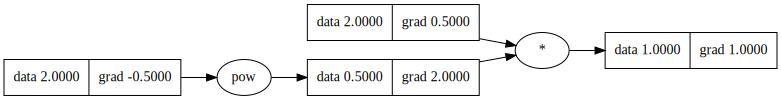

In [17]:
# a = Value(2.0)
# b = Value(2.0)
# c = a*b
# d = a/b
draw_dot(d)
# d.backward()

In [38]:
# without referencing our code/video __too__ much, make this cell work
# you'll have to implement (in some cases re-implemented) a number of functions
# of the Value object, similar to what we've seen in the video.
# instead of the squared error loss this implements the negative log likelihood
# loss, which is very often used in classification.

# this is the softmax function
# https://en.wikipedia.org/wiki/Softmax_function
def softmax(logits):
  counts = [logit.exp() for logit in logits]
  denominator = sum(counts)
  out = [c / denominator for c in counts]
  return out

# this is the negative log likelihood loss function, pervasive in classification
logits = [Value(0.0), Value(3.0), Value(-2.0), Value(1.0)]
probs = softmax(logits)
loss = -probs[3].log() # dim 3 acts as the label for this input example
loss.backward()
print(loss.data)
# draw_dot(loss)
ans = [0.041772570515350445, 0.8390245074625319, 0.005653302662216329, -0.8864503806400986]
for dim in range(4):
  ok = 'OK' if abs(logits[dim].grad - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {logits[dim].grad}")


2.1755153626167147
OK for dim 0: expected 0.041772570515350445, yours returns 0.041772570515350445
OK for dim 1: expected 0.8390245074625319, yours returns 0.8390245074625319
OK for dim 2: expected 0.005653302662216329, yours returns 0.005653302662216329
OK for dim 3: expected -0.8864503806400986, yours returns -0.8864503806400986


In [39]:
# verify the gradient using the torch library
# torch should give you the exact same gradient
import torch
t = torch.tensor(0).double()
t2 = torch.tensor(3.0).double()
t3 = torch.tensor(-2.0).double()
t4 = torch.tensor(1.0).double()
logits = [t,t2,t3,t4]
probst = softmax(logits)

logits = [Value(0.0), Value(3.0), Value(-2.0), Value(1.0)]
probs = softmax(logits)

print("Pytorch tensors: ", probst)
print("Micrograd: ", probs)

Pytorch tensors:  [tensor(0.0418, dtype=torch.float64), tensor(0.8390, dtype=torch.float64), tensor(0.0057, dtype=torch.float64), tensor(0.1135, dtype=torch.float64)]
Micrograd:  [Value(data=0.04177257051535045), Value(data=0.839024507462532), Value(data=0.00565330266221633), Value(data=0.11354961935990122)]
